![texto alternativo](https://drive.google.com/uc?id=1_ZoJOp39dxsRTVndJP1_7jdY7oGi8sSu) 

<h1><center>Redes Neuronales con Keras y Scikit</center></h1>


<center><i>Creando nuestra primera red neuronal</i></center>

# <h1>Contenido</h1>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <ol>
        <li><a href="#problema">Contexto Analítico</a></li>          
        <li><a href="#arquitectura">Arquitectura propuesta</a></li>
        <li><a href="#keras">Entrenamiento y Evaluación del Modelo</a></li>
    </ol>
</div>
<br>
<hr>
Para encontrar mas contenido de datasetes en keras, nos metemos a keras.io/datasets

# <h1 id="problema">Contexto analítico</h1>

Requerimos diseñar un modelo que permita determinar el precio medio de las viviendas en Boston, para ello contamos con un set de información disponible en Keras con características y precios de viviendas en diferentes ubicaciones de Boston de finales de 1970. (Mayor detalle disponible en http://lib.stat.cmu.edu/datasets/boston 

En total contamos con 506 muestras caracterizadas por 13 variables. 


 Variables | Description
 --- | ---
 CRIM   |  per capita crime rate by town
 ZN     |  proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS  |  proportion of non-retail business acres per town
 CHAS   |  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX    |  nitric oxides concentration (parts per 10 million)
 RM     |  average number of rooms per dwelling
 AGE    |  proportion of owner-occupied units built prior to 1940
 DIS    |  weighted distances to five Boston employment centres
 RAD    |  index of accessibility to radial highways
 TAX    |  full-value property-tax rate per \$10,000
 PTRATIO|  pupil-teacher ratio by town
 B      |  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT  |  % lower status of the population
 MEDV   |  Median value of owner-occupied homes in $1000's

In [ ]:
# Estos 2 comandos los copiamos de la pagina de keras
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.2,seed=10)

57344/57026 [==============================] - 0s 0us/step


In [ ]:
print("Tamaño set de entrenamiento:",x_train.shape)
print("Tamaño set de prueba:", x_test.shape)

Tamaño set de entrenamiento: (404, 13)
Tamaño set de prueba: (102, 13)


In [ ]:

print("Tamaño set de entrenamiento:",x_train.shape)
print("Tamaño set de prueba:",x_test.shape)



Tamaño set de entrenamiento: (404, 13)
Tamaño set de prueba: (102, 13)


In [ ]:
x_train[:1]

array([[5.4790e-02, 3.3000e+01, 2.1800e+00, 0.0000e+00, 4.7200e-01,
        6.6160e+00, 5.8100e+01, 3.3700e+00, 7.0000e+00, 2.2200e+02,
        1.8400e+01, 3.9336e+02, 8.9300e+00]])

# <h1 id="arquitectura">Arquitectura propuesta</h1>

Para diseñar el modelo implementaremos un red tal y como se ilustra enseguida:

![Arquitectura1](https://drive.google.com/uc?id=1RndIWQ4yVr9AvWi6Zbn6QNRpAJf33VeV)

La arquitectuea que usaremos es  una rede neuronal de 13 entrados, con 2 capas ocultas, la primera con 6 la segunda con 4 y una salida que es el precio


In [ ]:
import numpy as np
#Sequencial es para poner capa a capa la red neuronal
from keras.models import Sequential
#Capapa dense es la que coneta capa a capa la red neuronal
from keras.layers import Dense, Activation

#Definición de la arquitectura
#Esta es la cracion de la capas
#La activacion ReLu sirve para que todos los valores negativos se hagan 0
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal',activation='relu'))
model.add(Dense(6, kernel_initializer='normal',activation='relu'))
model.add(Dense(4, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compilación del modelo
#Despues compilamos el modelo y como es un modelo de regresion aplicamos el mean squared error
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_percentage_error'])

In [ ]:
#Aqui veos como esta compuesta la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 299
Trainable params: 299
Non-trainable params: 0
_________________________________________________________________
None


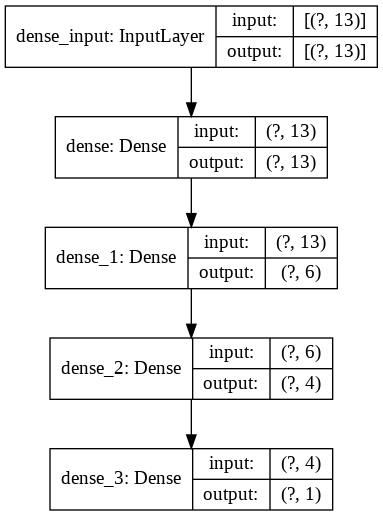

In [ ]:
#Aqui se grafica el modelo
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

# <h1 id="keras">Entrenamiento y Evaluación del modelo</h1>

Ahora realizaremos diferentes entrenamientos de la red neuronal diseña y evaluaremos su desempeño.

In [ ]:
#Entrena el modelo
#set de entrenamiento, valores numericos
x_val = x_train[300:,]
#Set de entrenamiento, etiquetas
y_val = y_train[300:,]
#Entrena el modelo
model.fit(x_train, y_train, batch_size=32, epochs=5,validation_data=(x_val,y_val))
#El resultado es mediocre

Epoch 1/5
13/13 [==============================] - 0s 12ms/step - loss: 588.1601 - mean_absolute_percentage_error: 99.6669 - val_loss: 531.9219 - val_mean_absolute_percentage_error: 99.2162
Epoch 2/5
13/13 [==============================] - 0s 2ms/step - loss: 580.3037 - mean_absolute_percentage_error: 98.5855 - val_loss: 518.9069 - val_mean_absolute_percentage_error: 97.3169
Epoch 3/5
13/13 [==============================] - 0s 2ms/step - loss: 557.8512 - mean_absolute_percentage_error: 95.6813 - val_loss: 484.0553 - val_mean_absolute_percentage_error: 92.0609
Epoch 4/5
13/13 [==============================] - 0s 2ms/step - loss: 502.1243 - mean_absolute_percentage_error: 87.3777 - val_loss: 402.1315 - val_mean_absolute_percentage_error: 78.5675
Epoch 5/5
13/13 [==============================] - 0s 2ms/step - loss: 383.6529 - mean_absolute_percentage_error: 69.9309 - val_loss: 255.5396 - val_mean_absolute_percentage_error: 55.2636


In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=100,validation_data=(x_val,y_val))
#Aqui vemos que el porcentage de error disminuyo debido a que se cambiaron las epocas, desto quiere decir que entre mas iteraciones da, mejores resultados arroja

In [ ]:
results = model.evaluate(x_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i]," : ", results[i])

4/4 [==============================] - 0s 2ms/step - loss: 277.3588 - mean_absolute_percentage_error: 54.6682
loss  :  277.3587951660156
mean_absolute_percentage_error  :  54.66817092895508


In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=100,validation_data=(x_val,y_val))

Epoch 1/100
13/13 [==============================] - 0s 5ms/step - loss: 220.4883 - mean_absolute_percentage_error: 51.2131 - val_loss: 141.8502 - val_mean_absolute_percentage_error: 49.0018
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 156.0938 - mean_absolute_percentage_error: 54.8874 - val_loss: 146.8670 - val_mean_absolute_percentage_error: 58.0667
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 144.9129 - mean_absolute_percentage_error: 52.9484 - val_loss: 128.0530 - val_mean_absolute_percentage_error: 49.4062
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 134.9925 - mean_absolute_percentage_error: 47.8744 - val_loss: 121.6780 - val_mean_absolute_percentage_error: 47.7660
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 128.3637 - mean_absolute_percentage_error: 46.8086 - val_loss: 116.3695 - val_mean_absolute_percentage_error: 46.8409
Epoch 6/100
13/13 [==========================

In [ ]:
results = model.evaluate(x_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i]," : ", results[i])

4/4 [==============================] - 0s 2ms/step - loss: 36.1994 - mean_absolute_percentage_error: 16.9495
loss  :  36.199432373046875
mean_absolute_percentage_error  :  16.949491500854492


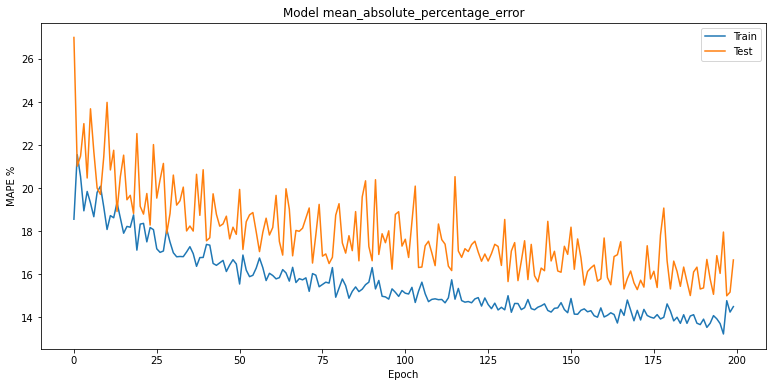

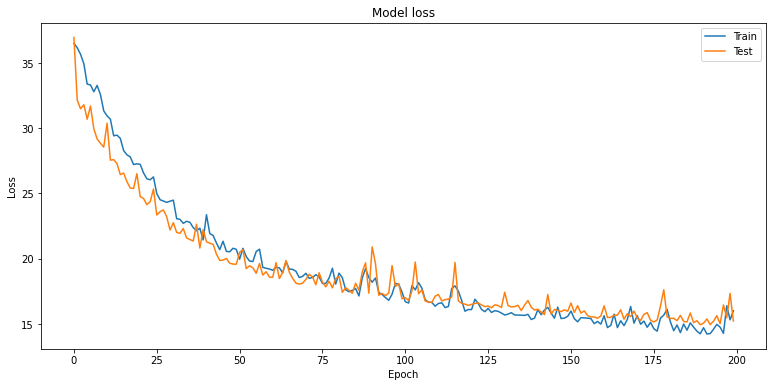

In [ ]:
import matplotlib.pyplot as plt
#aqui hacemos un analisis de todo lo que hizo nuestra red neuronal
#aqui vemos entre mas iteraciones menos error hay

history = model.fit(x_train, y_train, batch_size=32, epochs=200,validation_data=(x_val,y_val), verbose=0)
# Plot training & validation accuracy values
plt.figure(figsize=(13,6))
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()